In [6]:
using Pkg; Pkg.activate("..")
using Revise
using Geom4hep

# Defines the function to generate X-Ray image
include("XRay.jl")

  Activating environment at `~/Development/VecGeom/Geom4hep/Project.toml`


generateXRay (generic function with 1 method)

In [7]:
world = processGDML("boxes.gdml");

In [8]:
# Draw the geometry using Makie (GL)
using GLMakie
s = Scene()
draw(s, world)

GLMakie.Screen(...)

  0.574388 seconds (162.61 k allocations: 11.951 MiB, 8.86% gc time, 37.76% compilation time)


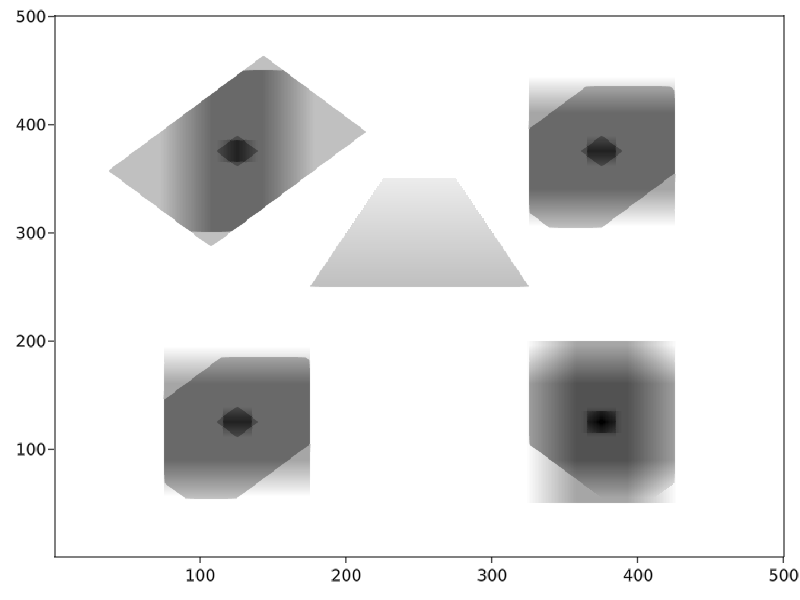

In [9]:
# produce the the X-ray and plot it
@time image = generateXRay(world, 2.5e5)
heatmap(image, colormap=:grayC)

In [10]:
@time image = generateXRay(world, 2.5e5);

  0.260678 seconds (7 allocations: 1.909 MiB)


```
- Original (2.5e5): 2.666829 seconds (32.01 M allocations: 1.160 GiB, 7.68% gc time) 132/point
- Dist2In:          1.507672 seconds (16.30 M allocations: 865.131 MiB, 12.13% gc time) 65/point
- ComposeTrans:     0.940077 seconds (13.58 M allocations: 679.396 MiB, 19.78% gc time)
- mutable structs:  0.865495 seconds (12.40 M allocations: 392.292 MiB, 14.28% gc time) 50/point
New geometry (8 daughters)
-                   0.880380 seconds (14.23 M allocations: 497.338 MiB, 10.70% gc time)
- (better state)    0.601588 seconds (8.86 M allocations: 198.566 MiB, 11.50% gc time)  32/point
-                   0.866047 seconds (12.08 M allocations: 252.167 MiB, 5.12% gc time)
-   use move        0.884013 seconds (7.36 M allocations: 143.197 MiB, 3.62% gc time)
-                   0.657817 seconds (7.22 M allocations: 139.122 MiB, 5.93% gc time)
-                   0.604687 seconds (7.22 M allocations: 139.122 MiB, 7.21% gc time)
-                   0.450634 seconds (6.07 M allocations: 102.197 MiB, 3.65% gc time)
-                   0.430143 seconds (5.82 M allocations: 94.568 MiB, 4.98% gc time)
-                   0.341285 seconds (3.00 M allocations: 51.531 MiB)  12/point
-                   0.247613 seconds (7 allocations: 1.909 MiB)
```